# Limited asset market participation model

This notebook shall help you to replicate a NK DSGE Model with two heterogeneous agents as well as find a non-linear solution to the problem. It is based on the paper by Florin Bilbiie, 2008. The file LAMP_julia.yaml which is printed below, describes the model, and it must be included in the same directory as this notebook.


## The setup
The model includes two heterogeneous representative agents. One of them can perfectly smooth her consumption by buying bonds and firms' shares. We refer to this agent as a shareholder or a saver. The other one doesn't have any access to the asset market. Her consumption in each period is defined purely by her salary. The share of her consumption in aggregate consumption is  λλ . We call this agent a rule-of-thumber or a non-asset holder.

The model delivers an interesting non-linear relation between the effect of the monetary policy and the relative importance of each agent. The reason for that is an arising wealth effect. A standard NK DSGE model lacks this feature since the profits are shared among all the population and hence have very small importance to consumption decision.

- Households.

The utility function is the same for both groups of households:
$U_j(C_j,N_j) = ln(C_j)-\nu \frac{N_j^{1+\phi}}{1+\phi}$ 

The first order conditions of a shareholder are: 

-  $\frac{\pi_{t+1}}{R_t} = \beta \frac{C_{s,t}}{C_{s,t+1}}$
-  $\nu N_{s,t}^{\phi}=\frac{W}{C_{s,t}}$

The resource constraint of the rule-of-thumb agent is $C_{h,t} = W_t N_{h,t}$ and the first order condition is given by: $\nu N_{h,t}^{\phi}=\frac{W}{C_{h,t}}$. Hence the labor supply of this agent is always fixed and defined as: $N_{h,t}=\nu^{-\frac{1}{1+\phi}}$

- The production side. 

The firm's problem is standard. The final good producers are assumed to be in perfect competition while the intermediate producers are monopolists with a production function : $Y_{i,t} = N_{i,t}-F = Y_t \left(\frac{P_{i,t}}{P_t}\right)^{-\epsilon}$, where F is a fixed cost. The marginal cost coming from minization problem of firms is: $W e^{z_t}$. $z_t$ represent a cost-push shock. The prices are defined by a Phillips curve which is derived from a maximization problem of firm specified as below:

$E_t\sum^{\infty}_{j=t}(\theta \beta)^{j-t} \frac{u_{C_s,t+j}}{P_{s,t+j}}\left\{ P_{i,t} \left(\frac{P_{i,t}}{P_{t+j}} \right)^{-\epsilon}Y_{t+j}-MC_{t+j}\left(\frac{P_{i,t}}{P_{t+j}}\right)^{-\epsilon}Y_{t+j}\right\}$ 

    
Here the regidity in prices is captured by the mechanisme presented by Calvo and Yun. $\theta$ is the probability that a firm won't be able to reoptimize price (technically speaking it's not a firm who set the price but its shareholders). The optimal price of a firm can be presented as:

$\frac{P_{i,t}}{P_t}= \tilde{p}_t(i)=\frac{F_1}{F_2}= \frac{ \frac{\epsilon}{\epsilon-1}mc_t\frac{C_t}{C_{s,t}}+ \beta \theta E_t \pi_{t+1}^{\epsilon}F_{1,t+1}}{\frac{C_t}{C_{s,t}}+ \beta \theta E_t \pi_{t+1}^{1-\epsilon}F_{2,t+1}}$

By assuming that $P_t= \left[ (1-\theta) P_{i,t}^{1-\epsilon} + \theta P_t^{1-\epsilon}\right]^{\frac{1}{1-\epsilon}}$   holds every period we can link optimal price to inflation   $ \tilde{p}_t(i) = \left[ \frac{1-\theta \pi_t^{\epsilon-1}}{\theta} \right]^{\frac{1}{1-\epsilon}}$

Now we define the link between aggregate output and aggregate inputs.

Let $ Y^{*}_t = \int Y_{i,t} di = Y_t P_t^{\epsilon} \int P_{i,t}^{-\epsilon}di =Y_t P_t^{\epsilon}(P_t^{*})^{\epsilon}$ with 
$ P_t^{*} = \left[\int P_{i,t}^{-\epsilon}di \right]^{\frac{-1}{\epsilon}}$

We define $\Delta_t$ is 1 over price distortion, $\Delta_t = \frac{P_t}{P_t^{*}}$ and from 
$ P_t^{*}  = \left[(1-\theta)P_{i,t}^{-\epsilon} + \theta (P_t^{*})^{-\epsilon} \right]^{\frac{1}{-\epsilon}} $ we obtain: $\Delta_t = \theta \pi_t^\epsilon \Delta_{t-1}+(1-\theta) \left(\frac{F1}{F2}\right)^{-\epsilon}$

In the equilibrium we have $C_t = \frac{N_t-F}{\Delta_t}$




For more detailes we refer the reader to the lecturenotes of Lawerence Christiano: http://www.nber.org/econometrics_minicourse_2011/lecture_on_NK.pdf

- Monetary policy

$log(\frac{R_t}{R^{*}}) = \phi_\pi*log\frac{\pi_{t+1}}{pi^{*}} + \phi_y*log\frac{C_t}{C^{*}}$



## Importing necessary libraries


In [1]:
path = Pkg.dir("Dolo")
import Dolo
import AxisArrays

## Writing the model

In [2]:
fn = "LAMP_4_julia.yaml"


"LAMP_4_julia.yaml"

In [3]:
model = Dolo.yaml_import(fn);

## Solving the model using time iteration routines

In [4]:
@time sol = Dolo.time_iteration(model)

------------------------------------------------------------------
It    ηₙ=|xₙ-xₙ₋₁|    λₙ=ηₙ/ηₙ₋₁      Time            Newton steps
------------------------------------------------------------------
0     NaN             NaN             0.00e+00        0    
1     1.25e-01        NaN             2.37e+00        3    
2     1.59e-01        1.27e+00        4.18e-02        2    
3     1.21e-01        7.57e-01        3.00e-02        2    
4     7.22e-02        5.98e-01        3.03e-02        2    
5     3.77e-02        5.23e-01        3.14e-02        2    
6     1.38e-02        3.66e-01        3.53e-02        2    
7     4.02e-03        2.91e-01        2.88e-02        2    
8     6.56e-03        1.63e+00        2.46e-02        2    
9     5.72e-03        8.72e-01        3.23e-02        1    
10    3.99e-03        6.97e-01        2.31e-02        1    
11    2.43e-03        6.09e-01        1.70e-02        1    
12    1.33e-03        5.49e-01        2.30e-02        1    
13    7.08e-04     

Results of Time Iteration Algorithm
 * Complementarities: true
 * Discretized Process type: Dolo.DiscretizedIIDProcess
 * Decision Rule type: Dolo.DecisionRule{Dolo.EmptyGrid,Dolo.CartesianGrid}
 * Number of iterations: 23
 * Convergence: true
   * |x - x'| < 1.0e-08: true


In [5]:
# we keep the d.r. only
dr = sol.dr

## Plotting a decision rule 

### Part I. Doing it manuelly.

In [6]:
# Choose the number of simulations
n_steps=50
s0 = model.calibration[:states]
m0 = model.calibration[:exogenous]
index = findfirst(model.symbols[:states],:Delta_L)

Dolo.DecisionRule{Dolo.EmptyGrid,Dolo.CartesianGrid}


2

In [7]:
# Define the bounds for your states variable
bounds = [dr.grid_endo.min[index], dr.grid_endo.max[index]]

2-element Array{Float64,1}:
 0.95
 1.05

In [8]:
Svalues = linspace(bounds[1], bounds[2], n_steps)
svec = vcat([e' for e in fill(s0, n_steps)]...) 
svec[:,index] = Svalues 
m = m0

1-element Array{Float64,1}:
 0.0

In [9]:
# Evaluating the decision rule on the linspace defined above. This step computes values for controle variables. 
xvec = dr(m0,svec);
mm = vcat([e' for e in fill(m, n_steps)]...)
# Creating list of exogenous, state, control variables
l = [mm, svec, xvec];
tb = hcat([e' for e in l']...);

### - plotting a decision rule using Pandas

In [10]:
l = cat(1, model.symbols[:exogenous] , model.symbols[:states] , model.symbols[:controls] )

10-element Array{Symbol,1}:
 :e_z    
 :z      
 :Delta_L
 :C_s    
 :N_s    
 :F1     
 :F2     
 :R      
 :real_r 
 :C      

In [11]:
import Pandas
# df = Pandas.DataFrame(tb, columns=[model.symbols[:exogenous][1], :z, :Delta_L, :C_s, :N_s, :F1, :F2, :R, :real_r, :C])
df = Pandas.DataFrame(tb, columns=l)

    e_z    z   Delta_L       C_s       N_s        F1        F2         R  \
0   0.0  0.0  0.950000  0.603196  0.696024  3.672481  3.755599  0.992681   
1   0.0  0.0  0.952041  0.602648  0.696457  3.682158  3.762290  0.993183   
2   0.0  0.0  0.954082  0.602099  0.696890  3.691861  3.768998  0.993685   
3   0.0  0.0  0.956122  0.601549  0.697323  3.701615  3.775741  0.994188   
4   0.0  0.0  0.958163  0.600997  0.697758  3.711448  3.782538  0.994690   
5   0.0  0.0  0.960204  0.600444  0.698195  3.721384  3.789406  0.995193   
6   0.0  0.0  0.962245  0.599889  0.698634  3.731449  3.796362  0.995696   
7   0.0  0.0  0.964286  0.599332  0.699075  3.741653  3.803414  0.996200   
8   0.0  0.0  0.966327  0.598772  0.699519  3.751991  3.810557  0.996703   
9   0.0  0.0  0.968367  0.598210  0.699964  3.762459  3.817791  0.997207   
10  0.0  0.0  0.970408  0.597646  0.700412  3.773054  3.825111  0.997711   
11  0.0  0.0  0.972449  0.597080  0.700861  3.783770  3.832515  0.998215   
12  0.0  0.0

### - Plotting a decision rule using Julia DataFrames

In [12]:
using DataArrays
import DataFrames

In [13]:
ll=[string(i) for i in l]

10-element Array{String,1}:
 "e_z"    
 "z"      
 "Delta_L"
 "C_s"    
 "N_s"    
 "F1"     
 "F2"     
 "R"      
 "real_r" 
 "C"      

In [14]:
using DataStructures
d = OrderedDict()
for i=1:length(ll)
    d[ll[i]] = tb[:,i]
end

In [15]:
df2 = DataFrames.DataFrame(d)

,e_z,z,Delta_L,C_s,N_s,F1,F2,R,real_r,C
1,0.0,0.0,0.95,0.6031963514359348,0.6960241955043249,3.672481202200612,3.7555994204284096,0.9926810239113035,0.9983400001377137,0.6004043764899283
2,0.0,0.0,0.9520408163265306,0.6026476784156397,0.6964566574361538,3.6821579631599137,3.7622895748014704,0.9931832290674216,0.9986268593639211,0.59996537559073
3,0.0,0.0,0.9540816326530612,0.6020985690610416,0.6968895536360927,3.691860669359361,3.7689975159696325,0.9936854920830064,0.9989134470411575,0.5995260329684512
4,0.0,0.0,0.9561224489795919,0.6015485870378376,0.6973233183722515,3.7016152660390964,3.7757410307279997,0.9941878708175236,0.9991994916204513,0.5990860069000106
5,0.0,0.0,0.9581632653061225,0.6009972960117247,0.6977583859127402,3.7114476984392644,3.782537905871674,0.99469042313044,0.9994847215528317,0.5986449556623277
6,0.0,0.0,0.960204081632653,0.6004442596483999,0.6981951905256691,3.7213839118000114,3.789405928195758,0.9951932068812219,0.9997688652893276,0.5982025375323217
7,0.0,0.0,0.9622448979591837,0.599889056822488,0.6986341503085942,3.7314489876264862,3.796362294840641,0.9956962771393919,1.0000516600046878,0.5977584224288359
8,0.0,0.0,0.9642857142857143,0.5993315394392897,0.6990753930652888,3.7416525016532325,3.803413617465316,0.9961996388893997,1.000332999481895,0.5973124892665408
9,0.0,0.0,0.9663265306122449,0.5987717955683395,0.6995187955031651,3.7519906175378086,3.8105573515703983,0.9967032537934464,1.0006129129658639,0.5968647977359073
10,0.0,0.0,0.9683673469387755,0.5982099210661429,0.6999642260503126,3.762459056705455,3.81779065075329,0.9972070820852817,1.0008914341680548,0.5964154134880725


### -  plotting the decision rule


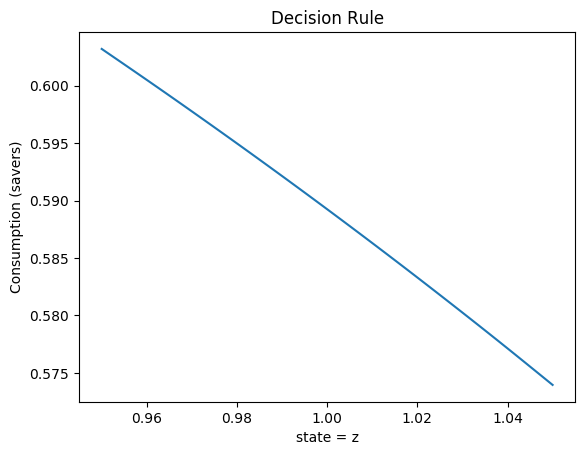

In [16]:
import PyPlot
plt = PyPlot;
plt.plot(Svalues, d["C_s"])
plt.ylabel("Consumption (savers)");
plt.xlabel("state = z");
plt.title("Decision Rule");

### Part II. Using Dolo functions

In [17]:
df= Dolo.tabulate(model, dr, :z, s0, m0)

2-dimensional AxisArray{Float64,2,...} with axes:
    :V, Symbol[:e_z,:z,:Delta_L,:C_s,:N_s,:F1,:F2,:R,:real_r,:C]
    :z, [-0.0333333,-0.0326599,-0.0319865,-0.0313131,-0.0306397,-0.0299663,-0.0292929,-0.0286195,-0.0279461,-0.0272727  …  0.0272727,0.0279461,0.0286195,0.0292929,0.0299663,0.0306397,0.0313131,0.0319865,0.0326599,0.0333333]
And data, a 10×100 Array{Float64,2}:
  0.0         0.0         0.0        …  0.0        0.0        0.0      
 -0.0333333  -0.0326599  -0.0319865     0.0319865  0.0326599  0.0333333
  1.0         1.0         1.0           1.0        1.0        1.0      
  0.592624    0.592555    0.592487      0.585993   0.585924   0.585856 
  0.712358    0.71225     0.712143      0.702151   0.702048   0.701945 
  3.85557     3.85728     3.85899    …  4.02829    4.03015    4.03201  
  3.88156     3.88275     3.88395       4.0014     4.00267    4.00395  
  1.00202     1.00208     1.00214       1.00788    1.00794    1.008    
  1.00385     1.00388     1.0039        1.00612 

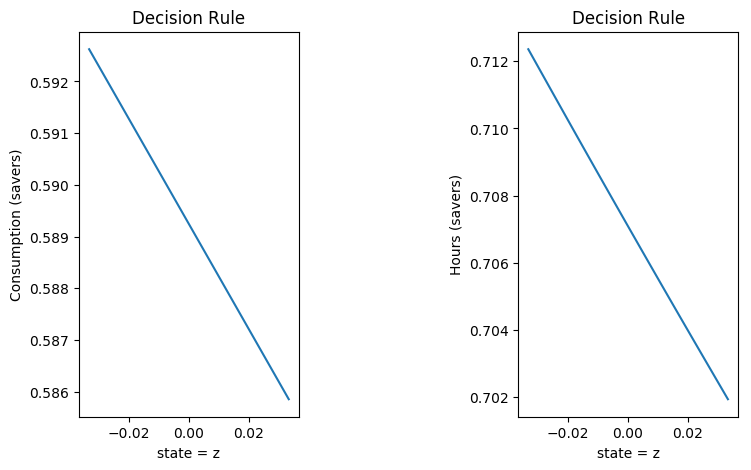

In [22]:
fig = plt.figure("Decision Rule",figsize=(8.5,5))

plt.subplot(1,2,1)
plt.plot(df[:z], df[:C_s])
plt.ylabel("Consumption (savers)");
plt.xlabel("state = z");
plt.title("Decision Rule");

plt.subplots_adjust(wspace=1)
# plt.tight_layout()

plt.subplot(1,2,2)
plt.plot(df[:z], df[:N_s])
plt.ylabel("Hours (savers)");
plt.xlabel("state = z");
plt.title("Decision Rule");

In [18]:
# plot_dr = Dolo.plot(model, dr, :Delta_L, bounds, s0, m0, [:C_s, :N_s, :R]);

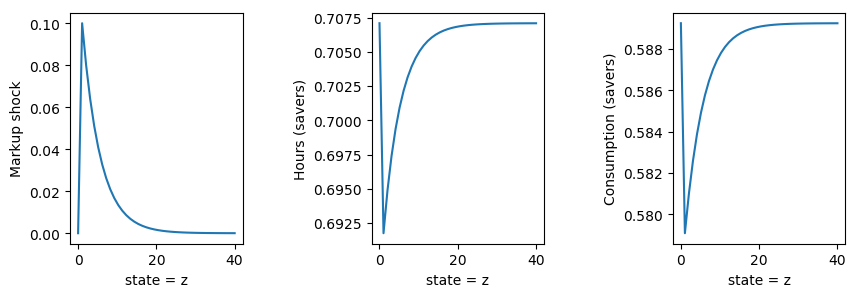

In [19]:
irf=Dolo.response(model, dr, s0, [0.1]; T=40)
hor =  linspace(0, 40, 40)

fig = plt.figure("Impulse response functions",figsize=(10,3))

plt.subplot(1,3,1)
plt.plot(hor, irf[:z])
plt.ylabel("Markup shock");
plt.xlabel("state = z");
# plt.title("IRF");

plt.subplots_adjust(wspace=.75)
# plt.tight_layout()

plt.subplot(1,3,2)
plt.plot(hor, irf[:N_s])
plt.ylabel("Hours (savers)");
plt.xlabel("state = z");
# plt.title("IRF");

plt.subplot(1,3,3)
plt.plot(hor, irf[:C_s])
plt.ylabel("Consumption (savers)");
plt.xlabel("state = z");
# plt.title("IRF");

In [20]:
Dolo.simulate(model, dr)

3-dimensional AxisArray{Float64,3,...} with axes:
    :N, 1:1
    :V, Symbol[:e_z,:z,:Delta_L,:C_s,:N_s,:F1,:F2,:R,:real_r,:C]
    :T, 1:40
And data, a 1×10×40 Array{Float64,3}:
[:, :, 1] =
 0.0  0.0  1.0  0.589242  0.707086  …  3.94154  1.00502  1.00502  0.589237

[:, :, 2] =
 0.0116085  0.0116085  1.0  0.588063  …  3.963  1.00606  1.00542  0.587609

[:, :, 3] =
 0.00293267  0.0122194  1.00001  …  3.96417  1.00612  1.00544  0.587522

...

[:, :, 38] =
 0.00163093  -0.00715909  1.00005  …  3.92866  1.00439  1.00478  0.590234

[:, :, 39] =
 -0.0113794  -0.0171067  1.00004  …  3.91063  1.0035  1.00443  0.591641

[:, :, 40] =
 0.0134351  -0.000250212  1.00004  …  3.94125  1.00501  1.00502  0.589263

## Simulating a model

In [21]:
using AxisArrays
using Unitful
import Unitful: s, ms, µs

In [22]:
# N = number of simulations, T = horizon
sim = Dolo.simulate(model, dr; N= 1000, T=50)

# compute the median 
a_sort = sort(collect(sim[Axis{:V}(:N_s)]),1)
a_median = a_sort[Int(size(sim,1)*0.5),:]

hor = linspace(1, sim[Axis{:T}][end], sim[Axis{:T}][end])

50-element LinSpace{Float64}:
 1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,…,44.0,45.0,46.0,47.0,48.0,49.0,50.0

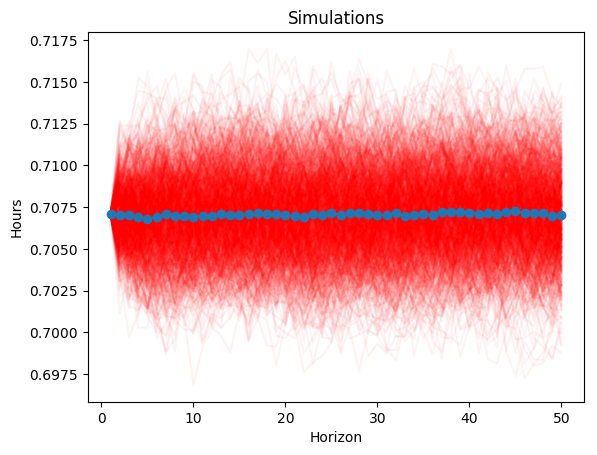

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb210edfbe0>

In [23]:
for i in 1:sim[Axis{:N}][end]
    plt.plot(hor, sim[Axis{:N}(i), Axis{:V}(:N_s)], color="red", alpha = .05)
end
plt.title("Simulations");
plt.xlabel("Horizon");
plt.ylabel("Hours");

plt.plot(hor, a_median, marker="o")




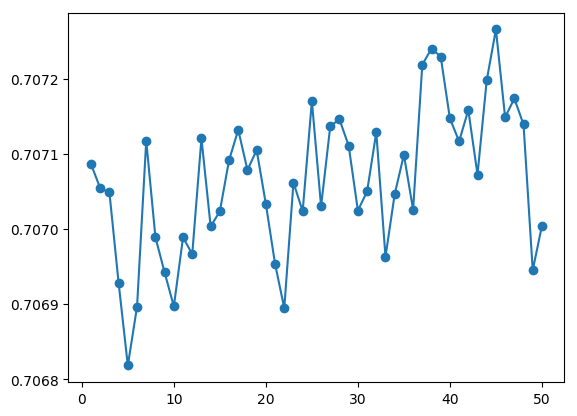

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb210bbb518>

In [24]:
plt.plot(hor, a_median, marker="o")
